<a href="https://colab.research.google.com/github/vu-topics-in-big-data-2022/Project-Incident-Team10/blob/main/join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read the road geometery

In [ ]:
!pip install geopandas pandas pyarrow

In [2]:
import geopandas as gpd

In [56]:
roads=gpd.read_file('USA_Tennessee.geojson')

In [59]:
roads.head(2)

,OID,XDSegID,PreviousXD,NextXDSegI,FRC,ToExport,Miles,Lanes,RoadNumber,RoadName,...,PrimaryTmc,RoadList,StartLat,StartLong,EndLat,EndLong,Bearing,XDGroup,ShapeSRID,geometry
0,7229828,136894283,441153578.0,441154707.0,4,None,0.475558,1.0225,,KNOB CREEK RD,...,,KNOB CREEK RD,36.35334,-82.42849,36.34747,-82.42857,E,765512,4326,"LINESTRING (-82.42849 36.35334, -82.42794 36.3..."
1,7229829,136894316,NaN,NaN,5,None,0.047735,1.1470,,16TH ST SW,...,,16TH ST SW|16TH ST,35.95902,-83.93125,35.95965,-83.93160,N,765513,4326,"LINESTRING (-83.93128 35.95901, -83.93158 35.9..."


In [60]:
roads.columns

Index(['OID', 'XDSegID', 'PreviousXD', 'NextXDSegI', 'FRC', 'ToExport',
       'Miles', 'Lanes', 'RoadNumber', 'RoadName', 'Country', 'State',
       'County', 'PostalCode', 'SlipRoad', 'SpecialRoa', 'IsConnecto',
       'AllTmcList', 'PrimaryTmc', 'RoadList', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'ShapeSRID', 'geometry'],
      dtype='object')

In [61]:
roads.dtypes

OID              int64
XDSegID          int64
PreviousXD     float64
NextXDSegI     float64
FRC             object
ToExport        object
Miles          float64
Lanes          float64
RoadNumber      object
RoadName        object
Country         object
State           object
County          object
PostalCode      object
SlipRoad        object
SpecialRoa      object
IsConnecto      object
AllTmcList      object
PrimaryTmc      object
RoadList        object
StartLat       float64
StartLong      float64
EndLat         float64
EndLong        float64
Bearing         object
XDGroup          int64
ShapeSRID        int64
geometry      geometry
dtype: object

In [8]:
#FRC describes the road kind. 1 are major interstates and 5 are very small roads. See https://docs.inrix.com/reference/glossary/

In [7]:
roads=roads[roads.County=='DAVIDSON']

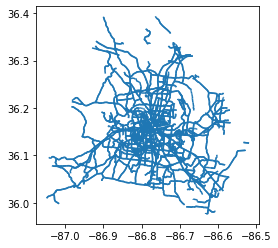

In [9]:
roads.plot()

In [10]:
roads.geometry # these are the line strings describing the road.

9033     LINESTRING (-86.75077 36.17116, -86.75076 36.1...
9045     LINESTRING (-86.77000 36.11989, -86.77046 36.1...
9051     LINESTRING (-86.77935 36.03619, -86.77935 36.0...
9055     LINESTRING (-86.75020 36.15446, -86.75019 36.1...
9056     LINESTRING (-86.71250 36.32843, -86.71272 36.3...
                               ...                        
94650    LINESTRING (-86.76221 36.16760, -86.76275 36.1...
94789    LINESTRING (-86.77707 36.12617, -86.77705 36.1...
94794    LINESTRING (-86.84079 36.15400, -86.84201 36.1...
94893    LINESTRING (-86.74435 36.14281, -86.74437 36.1...
95025    LINESTRING (-86.70474 36.12184, -86.70476 36.1...
Name: geometry, Length: 8641, dtype: geometry

In [11]:
# Lets read incident data

In [12]:
import pandas as pd

In [62]:
incidents=pd.read_parquet('nfd_incidents_xd_seg.parquet')

In [14]:
import shapely

In [15]:
incidents['geometry']=incidents.geometry.apply(shapely.wkt.loads)

In [16]:
incidents = gpd.GeoDataFrame(incidents,geometry=incidents.geometry)

In [63]:
incidents.head(2)

,ID_Original,latitude,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry,Incident_ID,Dist_to_Seg,XDSegID
0,ObjectId(59d3a81908f47311c891f8e2),36.037228,-86.783243,29B5,2017-01-01 07:59:29.507,2017-01-01 01:59:29.507,268.0,6,1,POINT (-86.78324314 36.03722849),10,13.550370,1.524394e+09
1,ObjectId(59d3a81908f47311c891f8e6),36.037414,-86.786572,29D2P,2017-01-01 08:30:55.000,2017-01-01 02:30:55.000,512.0,6,1,POINT (-86.78657189 36.03741402),11,3.663952,1.524356e+09


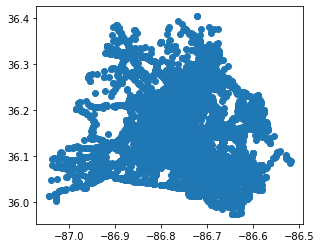

In [18]:
incidents.plot()

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install geopandas

In [64]:
results = roads.merge(incidents, on="XDSegID")

In [65]:
results.head(1)

,OID,XDSegID,PreviousXD,NextXDSegI,FRC,ToExport,Miles,Lanes,RoadNumber,RoadName,...,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry_y,Incident_ID,Dist_to_Seg
0,8073455,155711459,NaN,NaN,5,None,0.028749,NaN,,BERRY RD,...,-86.770009,29D2L,2020-07-04 03:42:22.387,2020-07-03 22:42:22.387,356.0,4,0,POINT (-86.77000923 36.1198734),23833,2.63476


In [66]:
results.dtypes

OID                           int64
XDSegID                       int64
PreviousXD                  float64
NextXDSegI                  float64
FRC                          object
ToExport                     object
Miles                       float64
Lanes                       float64
RoadNumber                   object
RoadName                     object
Country                      object
State                        object
County                       object
PostalCode                   object
SlipRoad                     object
SpecialRoa                   object
IsConnecto                   object
AllTmcList                   object
PrimaryTmc                   object
RoadList                     object
StartLat                    float64
StartLong                   float64
EndLat                      float64
EndLong                     float64
Bearing                      object
XDGroup                       int64
ShapeSRID                     int64
geometry_x                 g

In [67]:
results = results[(results["response_time_sec"]>0) & (results["Dist_to_Seg"]>0)]

In [68]:
temp = results.groupby(['PostalCode']).response_time_sec.agg(['max', 'min', 'count', 'median', 'mean'])

In [69]:
temp.sort_values(by=['median'], ascending=False).head(10)

,max,min,count,median,mean
PostalCode,,,,,
37122,1123.0,63.0,8,610.5,624.125000
37189,2000.0,27.0,263,558.0,619.498099
37073,550.0,550.0,1,550.0,550.000000
37086,2159.0,253.0,49,495.0,593.591837
37080,2222.0,8.0,178,494.5,570.780899
37027,2696.0,5.0,368,487.5,533.260870
37076,2244.0,1.0,687,421.0,465.465793
37221,2079.0,4.0,467,419.0,488.809422
37228,2314.0,6.0,173,404.0,471.988439


In [39]:
df = results.groupby(['RoadName']).size().reset_index(name='counts')

In [42]:
df.sort_values(by=['counts'], ascending=False)

,RoadName,counts
316,I-24 E,1406
392,OLD HICKORY BLVD,1070
317,I-24 W,993
191,BRILEY PKWY,659
366,MURFREESBORO PIKE,642
...,...,...
248,E DUE WEST AVE,1
249,E IRIS DR,1
257,ELECTRIC AVE,1
411,RIVER HILLS DR,1


In [43]:
df.loc[df['counts'].idxmax()]

RoadName    I-24 E
counts        1406
Name: 316, dtype: object